<a href="https://colab.research.google.com/github/Keerthanatata/customer-perssonality/blob/main/Copy_of_Customer_personality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from imblearn import under_sampling
from imblearn.under_sampling import RandomUnderSampler  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.DataFrame
df = pd.read_csv("/content/drive/MyDrive/customerpersonality.csv")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

In [ ]:
# check which columns have null values, it seems only income has null values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
# isolate null values to see if there is any relationship, but it doesnt seem like there is
null_income = df.loc[df.Income.isnull()]

In [ ]:
med = df.Income.median()
df.Income.fillna(med, inplace=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
#convert the column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format = True)

In [ ]:

df['Age']=2021-df['Year_Birth']


In [ ]:

#created a column showing the total amount a customer spent
df['TotalMnt'] = df.MntMeatProducts + df. MntWines + df.MntFruits + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds
#combined the kidhome and teenhome columns into one column that shows the number of children per household
df['children'] = df.Kidhome + df.Teenhome

In [ ]:
#number of purchases the customer made
df['TotalNumPurchases'] = df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases
#number of purchases that were discounted
df['num_discounted'] = round(df['NumDealsPurchases']/df['TotalNumPurchases'],3)
#check which percent of purchases that were made per platform
df['web_to_total'] = round(df.NumWebPurchases/df.TotalNumPurchases,3)
df['catalog_to_total'] = round(df.NumCatalogPurchases/df.TotalNumPurchases,3)
df['Store_to_total'] = round(df.NumStorePurchases/df.TotalNumPurchases,3)
#fill the na values with 0 because if it is null then that means that there were no purchases for that customer, through that specific channel
df.fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


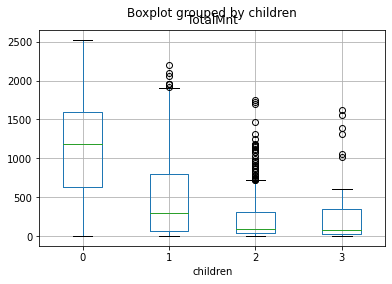

In [ ]:
#counts the number of campaigns that the customer accepted
df['num_cmp'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response
#graph to see if there is a relationship between total amount spent and number of children
df.boxplot(column = 'TotalMnt', by = 'children')

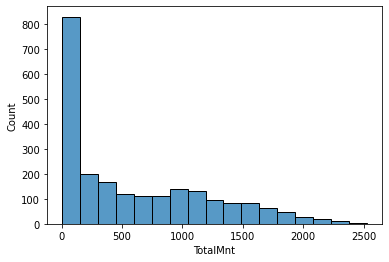

In [ ]:
 #check the distribution of amount spent and it seems skewed
sns.histplot(df.TotalMnt)

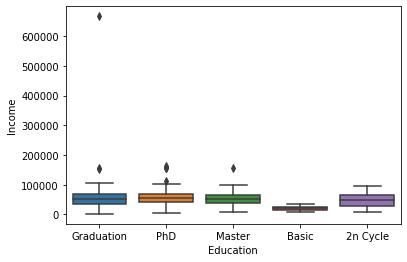

In [ ]:
#checked to see if education had a big impact on income and aside from the basic education level, it did no seem like it
sns.boxplot(x=df.Education, y=df.Income)

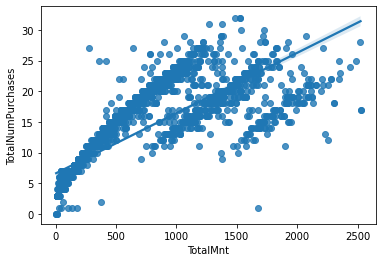

In [ ]:
#spotted an outlier and put an age cap to limit it 
df = df.loc[df.Age < 100]
#check for the relationship between total amount spent and total number purhcases
sns.regplot(x = df.TotalMnt, y = df.TotalNumPurchases)

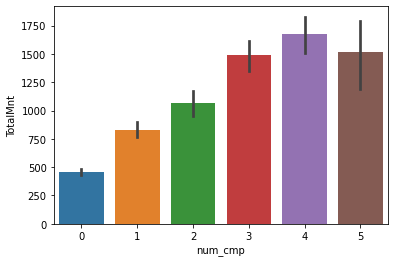

In [ ]:
#check to see if the number of successful campaigns increased sales
sns.barplot(y = 'TotalMnt', x = 'num_cmp', data = df)

In [ ]:
df.corr()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Age,TotalMnt,children,TotalNumPurchases,num_discounted,web_to_total,catalog_to_total,Store_to_total,num_cmp
ID,1.000000,0.003024,0.013737,0.002202,-0.003543,-0.046755,-0.021181,0.007080,-0.002622,-0.023181,...,-0.021810,-0.003024,-0.015830,-0.000989,-0.014021,0.019802,-0.015210,-0.007265,0.005413,-0.036025
Year_Birth,0.003024,1.000000,-0.162346,0.234133,-0.363350,-0.019670,-0.163035,-0.013751,-0.030927,-0.042519,...,0.018424,-1.000000,-0.113865,-0.095481,-0.173200,0.070757,0.014365,-0.121211,0.105116,0.007393
Income,0.013737,-0.162346,1.000000,-0.424887,0.019117,-0.003205,0.576731,0.428191,0.577524,0.437214,...,0.133121,0.162346,0.664707,-0.290380,0.622857,-0.282871,-0.178284,0.496981,-0.318175,0.286882
Kidhome,0.002202,0.234133,-0.424887,1.000000,-0.035753,0.007544,-0.496367,-0.372488,-0.437059,-0.387536,...,-0.080176,-0.234133,-0.556902,0.690121,-0.569244,0.306640,0.190031,-0.450251,0.267526,-0.193287
Teenhome,-0.003543,-0.363350,0.019117,-0.035753,1.000000,0.017115,0.005409,-0.175951,-0.260820,-0.203900,...,-0.154730,0.363350,-0.137769,0.698558,0.038134,0.117098,0.121848,-0.110269,0.014674,-0.158979
Recency,-0.046755,-0.019670,-0.003205,0.007544,0.017115,1.000000,0.016668,-0.003592,0.023705,0.001532,...,-0.198568,0.019670,0.021199,0.017796,0.006734,0.008699,-0.018559,0.038073,-0.024522,-0.088749
MntWines,-0.021181,-0.163035,0.576731,-0.496367,0.005409,0.016668,1.000000,0.388518,0.561993,0.399073,...,0.247392,0.163035,0.891734,-0.351487,0.756494,-0.263377,-0.115670,0.524808,-0.377698,0.488908
MntFruits,0.007080,-0.013751,0.428191,-0.372488,-0.175951,-0.003592,0.388518,1.000000,0.542057,0.594438,...,0.125904,0.013751,0.613122,-0.394122,0.521227,-0.224160,-0.169793,0.424706,-0.245332,0.172083
MntMeatProducts,-0.002622,-0.030927,0.577524,-0.437059,-0.260820,0.023705,0.561993,0.542057,1.000000,0.567880,...,0.236640,0.030927,0.842655,-0.501814,0.623373,-0.260196,-0.265060,0.616708,-0.344719,0.329733
MntFishProducts,-0.023181,-0.042519,0.437214,-0.387536,-0.203900,0.001532,0.399073,0.594438,0.567880,1.000000,...,0.111415,0.042519,0.642395,-0.425136,0.537435,-0.236948,-0.190207,0.471422,-0.271493,0.179535


Text(0.5, 1.0, 'Heatmap displaying the relationship between the variabls of the data')

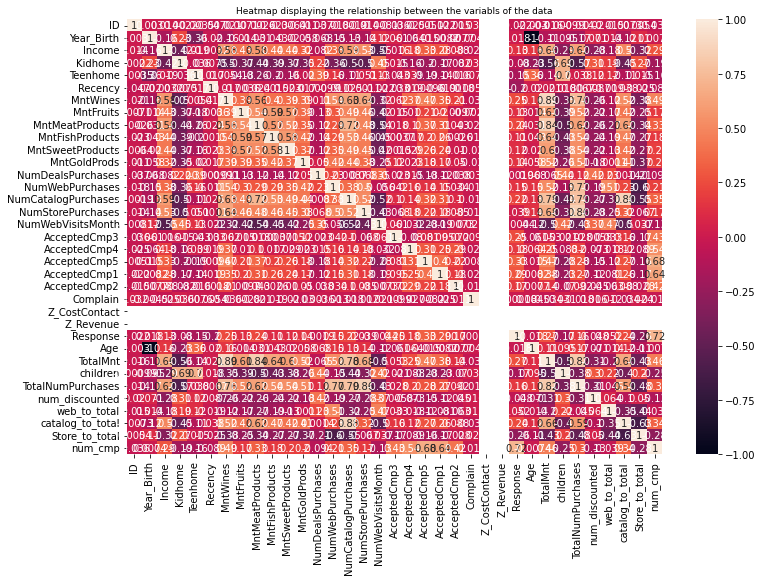

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap displaying the relationship between the variabls of the data',fontsize=9)